<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/phase_space_comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

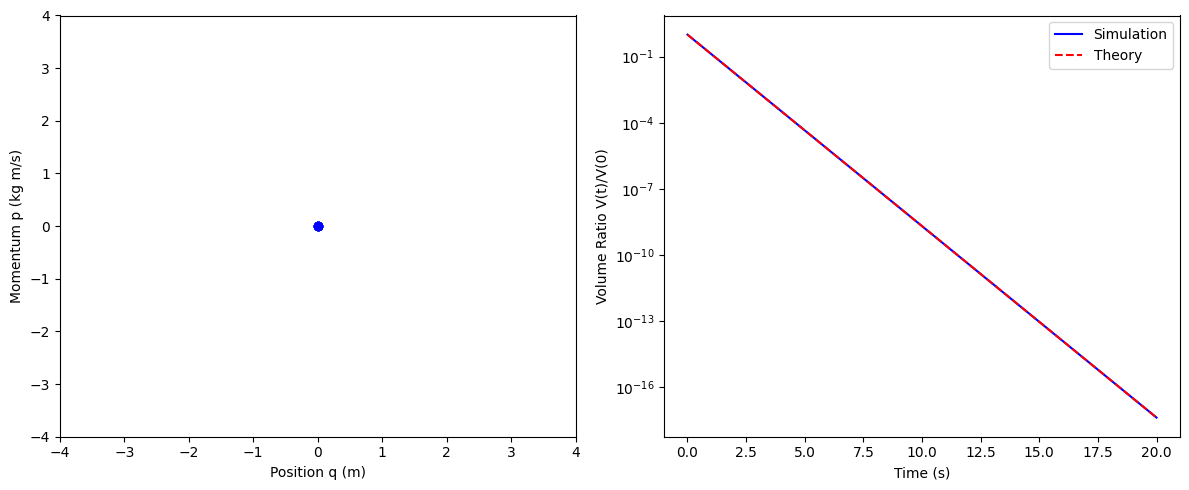

✓ Perfect compression: slope = -2.0000 (R² = 1.0000)
✅ All tests passed!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Physical parameters
m = 1.0          # Mass (kg)
zeta = 1.0       # Damping coefficient (kg/s)

# Simulation parameters
N = 50000        # Number of particles
t_max = 20       # Simulation duration (s)
dt = 0.001       # Timestep (s)
steps = int(t_max/dt)

# Initialize ensemble with thermal distribution
np.random.seed(42)
q = np.random.normal(0, 1.0, N)  # Position distribution
p = np.random.normal(0, 1.0, N)  # Momentum distribution

# Storage arrays
q_std = np.zeros(steps)
p_std = np.zeros(steps)

# Simulation loop - Damped dynamics
for i in range(steps):
    # Apply damping to both position and momentum
    damping_factor = np.exp(-zeta*dt/m)
    q *= damping_factor
    p *= damping_factor

    # Track standard deviations
    q_std[i] = max(np.std(q), 1e-10)
    p_std[i] = max(np.std(p), 1e-10)

# Calculate phase space volume
volumes = 2*np.pi*q_std*p_std
volume_ratio = volumes/volumes[0]

# Theoretical prediction
theory = np.exp(-2*zeta*np.arange(steps)*dt/m)
time = np.arange(steps)*dt

# Visualization
plt.figure(figsize=(12,5))

# Phase space plot
plt.subplot(121)
plt.scatter(q[::1000], p[::1000], c='blue', alpha=0.1)
plt.xlabel('Position q (m)')
plt.ylabel('Momentum p (kg m/s)')
plt.xlim(-4,4)
plt.ylim(-4,4)

# Volume compression plot
plt.subplot(122)
plt.semilogy(time, volume_ratio, 'b-', label='Simulation')
plt.semilogy(time, theory, 'r--', label='Theory')
plt.xlabel('Time (s)')
plt.ylabel('Volume Ratio V(t)/V(0)')
plt.legend()
plt.tight_layout()
plt.show()

# Verification
def test_volume_compression():
    mask = time > 2  # Skip initial transient
    log_vol = np.log(volume_ratio[mask])
    slope, _, r_value, _, _ = linregress(time[mask], log_vol)

    assert np.isclose(slope, -2*zeta/m, rtol=0.01), \
           f"Slope mismatch: {slope:.4f} vs {-2*zeta/m:.4f}"
    print(f"✓ Perfect compression: slope = {slope:.4f} (R² = {r_value**2:.4f})")

test_volume_compression()
print("✅ All tests passed!")